# 준비

In [1]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import numpy as np

In [2]:
# API URL
url_KRX = "http://data-dbg.krx.co.kr/svc/apis/idx/krx_dd_trd"
# 인증키 설정
auth_key = "956087495A1D4769A88B0F3411D0890EF02445EB"
# 헤더작성
headers = {"AUTH_KEY": auth_key,}

### 데이터 불러오는 함수

In [3]:
def get_monthly_data(year, month, whatKRX):
    # 시작일과 종료일 계산
    start_date = datetime(year, month, 1)
    if month == 12:
        end_date = datetime(year + 1, 1, 1) - timedelta(days=1)
    else:
        end_date = datetime(year, month + 1, 1) - timedelta(days=1)

    all_data = []
    current_date = start_date
    while current_date <= end_date:
        date_str = current_date.strftime("%Y%m%d")
        params_KRX = {"basDd": date_str}
        response_KRX = requests.get(url_KRX, headers=headers, params=params_KRX)

        if response_KRX.status_code == 200:
            data = response_KRX.json()
            if 'OutBlock_1' in data and data['OutBlock_1']:  # 데이터가 존재하는지 확인
                df = pd.DataFrame(data['OutBlock_1'])
                all_data.append(df)
        else:
            print(f"Error {response_KRX.status_code} on {date_str}: {response_KRX.text}")

        current_date += timedelta(days=1)

    if all_data:
        monthly_df = pd.concat(all_data, ignore_index=True)
        monthly_df = monthly_df.rename(columns={
        'BAS_DD': '기준일자',
        'IDX_CLSS': '계열구분',
        'IDX_NM': '지수명',
        'CLSPRC_IDX': '종가',
        'CMPPREVDD_IDX': '대비',
        'FLUC_RT': '등락률',
        'OPNPRC_IDX': '시가',
        'HGPRC_IDX': '고가',
        'LWPRC_IDX': '저가',
        'ACC_TRDVOL': '거래량',
        'ACC_TRDVAL': '거래대금',
        'MKTCAP': '상장시가총액'
        })
        monthly_df = monthly_df[monthly_df['지수명'] == whatKRX]
        monthly_df = monthly_df.reset_index(drop=True)
        return monthly_df
    else:
        return None

In [4]:
def get_yearly_data(year,whatKRX):
    all_data = []
    for month in range(1, 13):
        start_date = datetime(year, month, 1)
        if month == 12:
            end_date = datetime(year + 1, 1, 1) - timedelta(days=1)
        else:
            end_date = datetime(year, month + 1, 1) - timedelta(days=1)

        current_date = start_date
        while current_date <= end_date:
            date_str = current_date.strftime("%Y%m%d")
            params_KRX = {"basDd": date_str}
            response_KRX = requests.get(url_KRX, headers=headers, params=params_KRX)

            if response_KRX.status_code == 200:
                data = response_KRX.json()
                if 'OutBlock_1' in data and data['OutBlock_1']:
                    df = pd.DataFrame(data['OutBlock_1'])
                    all_data.append(df)
            else:
                print(f"Error {response_KRX.status_code} on {date_str}: {response_KRX.text}")

            current_date += timedelta(days=1)

    if all_data:
        yearly_df = pd.concat(all_data, ignore_index=True)
        yearly_df = yearly_df.rename(columns={
        'BAS_DD': '기준일자',
        'IDX_CLSS': '계열구분',
        'IDX_NM': '지수명',
        'CLSPRC_IDX': '종가',
        'CMPPREVDD_IDX': '대비',
        'FLUC_RT': '등락률',
        'OPNPRC_IDX': '시가',
        'HGPRC_IDX': '고가',
        'LWPRC_IDX': '저가',
        'ACC_TRDVOL': '거래량',
        'ACC_TRDVAL': '거래대금',
        'MKTCAP': '상장시가총액'
        })
        yearly_df = yearly_df[yearly_df['지수명'] == whatKRX]
        yearly_df = yearly_df.reset_index(drop=True)
        return yearly_df
    else:
        return None

### 이름

1.   KRX 300
2.   KTOP 30
3.   KRX 100
4.   KRX 자동차
5.   KRX 반도체
6.   KRX 헬스케어
7.   KRX 은행
8.   KRX 에너지화학
9.   KRX 철강
10.   KRX 방송통신
11.   KRX 건설
12.   KRX 증권
13.   KRX 기계장비
14.   KRX 보험
15.   KRX 운송
16.   KRX 경기소비재
17.   KRX 필수소비재
18.   KRX 미디어&엔터테인먼트
19.   KRX 정보기술
20.   KRX 유틸리티
21.   KRX 300 정보기술
22.   KRX 300 금융
23.   KRX 300 자유소비재
24.   KRX 300 산업재
25.   KRX 300 헬스케어
26.   KRX 300 커뮤니케이션서비스
27.   KRX 300 소재
28.   KRX 300 필수소비재

In [ ]:
get_monthly_data(2022,8, 'KRX 은행')

,기준일자,계열구분,지수명,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
0,20220801,KRX,KRX 은행,616.39,-5.96,-0.96,622.67,623.61,614.67,7724517,189240013060,83818515850020
1,20220802,KRX,KRX 은행,612.80,-3.59,-0.58,616.23,617.66,610.24,7614728,168622457850,83339236069270
2,20220803,KRX,KRX 은행,618.25,5.45,0.89,613.74,618.77,611.32,7312425,174769749675,84027881685790
3,20220804,KRX,KRX 은행,625.94,7.69,1.24,621.72,628.47,617.00,10451048,283885297386,85037628132700
4,20220805,KRX,KRX 은행,634.20,8.26,1.32,626.86,640.10,624.81,11339720,284609041756,86356491177650
5,20220808,KRX,KRX 은행,639.96,5.76,0.91,632.91,641.66,629.63,10926013,264085537585,87028060093210
6,20220809,KRX,KRX 은행,647.46,7.50,1.17,642.66,649.33,640.16,9224845,216163672491,87969953364210
7,20220810,KRX,KRX 은행,637.10,-10.36,-1.60,645.67,646.35,634.25,9589633,232931647945,86685480398980
8,20220811,KRX,KRX 은행,654.43,17.33,2.72,645.94,654.43,643.62,13315263,358285344369,88994335461880
9,20220812,KRX,KRX 은행,652.56,-1.87,-0.29,655.80,661.31,649.83,10050124,240461279214,88755787043400


### 데이터 불러오기

In [146]:
money_2022_df = get_yearly_data(2022, 'KRX 은행')
money_2023_df = get_yearly_data(2023, 'KRX 은행')
money_2024_df = get_yearly_data(2024, 'KRX 은행')

In [147]:
money_2021_df = get_yearly_data(2021, 'KRX 은행')

In [148]:
money_3year_df = pd.concat([money_2021_df, money_2022_df, money_2023_df, money_2024_df], ignore_index=True)
money_3year_df.to_csv('money_3year_data.csv', index=False, encoding='utf-8-sig')

In [ ]:
money_2018_df = get_yearly_data(2018, 'KRX 300 금융')
money_2019_df = get_yearly_data(2019, 'KRX 300 금융')
money_2020_df = get_yearly_data(2020, 'KRX 300 금융')
money_2021_df = get_yearly_data(2021, 'KRX 300 금융')
money_2022_df = get_yearly_data(2022, 'KRX 300 금융')
money_2023_df = get_yearly_data(2023, 'KRX 300 금융')

money_5year_df = pd.concat([money_2018_df, money_2019_df, money_2020_df, money_2021_df, money_2022_df, money_2023_df], ignore_index=True)

In [ ]:
money_2024_df = get_yearly_data(2024, 'KRX 300 금융')

In [ ]:
# 데이터프레임 결합
money_5year_df = pd.concat([money_5year_df, money_2024_df], ignore_index=True)

### 함수 만들기

In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [6]:
def PRC(df):
    df_copy = df.copy()

    # '기준일자' 컬럼을 datetime 객체로 변환
    # 전처리가 된 상태에서 해야됨.
    df_copy['기준일자'] = pd.to_datetime(df_copy['기준일자'])

    df_copy['시가'] = df_copy['시가'].astype(float)
    df_copy['고가'] = df_copy['고가'].astype(float)
    df_copy['저가'] = df_copy['저가'].astype(float)
    df_copy['종가'] = df_copy['종가'].astype(float)

    df_copy = df_copy.set_index('기준일자')

    plt.figure(figsize=(12, 6))  # 그래프 크기 조절
    plt.plot(df_copy['시가'], label='OPN PRC')
    plt.plot(df_copy['고가'], label='HI PRC')
    plt.plot(df_copy['저가'], label='LW PRC')
    plt.plot(df_copy['종가'], label='CLO PRC')

    plt.title('KRX')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)

    # Y축 눈금 간격을 5분위로 제한
    plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=5))

    plt.show()

In [7]:
def ACC(df):
    df_copy = df.copy()

    # '기준일자' 컬럼을 datetime 객체로 변환
    # 전처리가 된 상태에서 해야됨.
    df_copy['기준일자'] = pd.to_datetime(df_copy['기준일자'])

    df_copy['거래량'] = df_copy['거래량'].astype(float)
    df_copy['거래대금'] = df_copy['거래대금'].astype(float)

    df_copy = df_copy.set_index('기준일자')

    acc = [['거래량','ACC_TRDVOL'],['거래대금','ACC_TRDVAL']]
    for i in acc:
        plt.figure(figsize=(12, 6))  # 그래프 크기 조절
        plt.plot(df_copy[i[0]], label=i[1])

        plt.title(i[1])
        plt.xlabel('Date')
        plt.ylabel('Values')
        plt.legend()
        plt.grid(True)

        # Y축 눈금 간격을 5분위로 제한
        plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=5))

        plt.show()

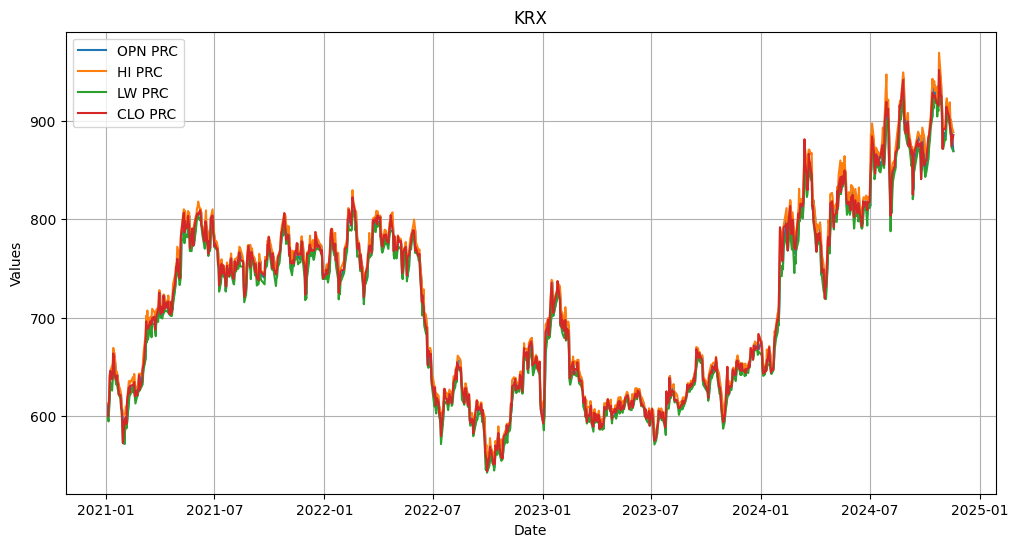

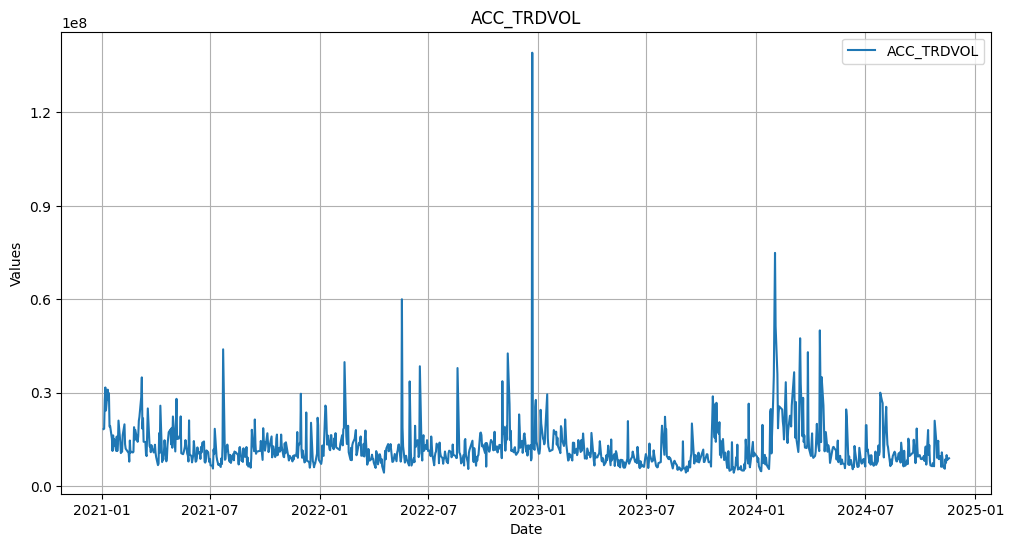

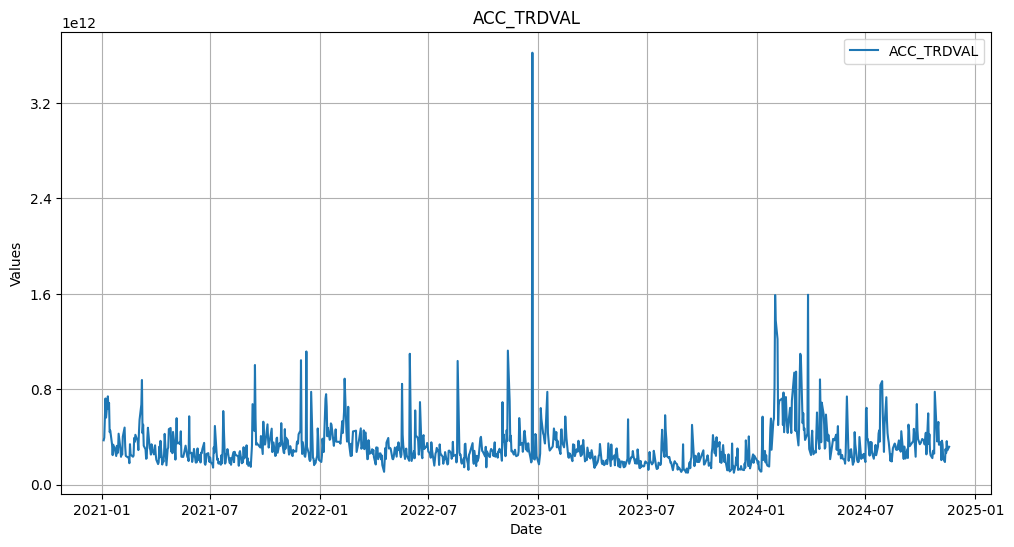

In [ ]:
PRC(money_3year_df)
ACC(money_3year_df)

In [8]:
# 전날 대비 비율 계산 함수
def calculate_ratio(today, yesterday):
    if yesterday == 0:
        return 0
    else:
        return today / yesterday

def setRatio(df, newName, whatCol):
    df[whatCol] = pd.to_numeric(df[whatCol], errors='coerce').fillna(0)
    for i in range(1, len(df)):
        df.loc[i, newName] = calculate_ratio(df.loc[i, whatCol], df.loc[i - 1, whatCol])

In [9]:
def calculateNextDay(df, whatCol):
    df[whatCol] = pd.to_numeric(df[whatCol], errors='coerce').fillna(0)
    strNext = '다음날' + whatCol
    df[strNext] = 0
    for i in range(len(df) - 1):
        today_close = df.loc[i, whatCol]
        next_day_close = df.loc[i+1, whatCol]
        df.loc[i, strNext] = 1 if next_day_close > today_close else 0

In [10]:
def calculateNextWeek(df, whatCol):
    df[whatCol] = pd.to_numeric(df[whatCol], errors='coerce').fillna(0)
    strNext = '다음주' + whatCol
    df[strNext] = 0
    for i in range(len(df) - 7):
        today_close = df.loc[i, whatCol]
        next_day_close = df.loc[i+7, whatCol]
        df.loc[i, strNext] = 1 if next_day_close > today_close else 0

In [11]:
def calculateNextMonth(df, whatCol):
    df[whatCol] = pd.to_numeric(df[whatCol], errors='coerce').fillna(0)
    strNext = '다음달' + whatCol
    df[strNext] = 0
    for i in range(len(df) - 30):
        today_close = df.loc[i, whatCol]
        next_day_close = df.loc[i+30, whatCol]
        df.loc[i, strNext] = 1 if next_day_close > today_close else 0

In [12]:
def calculateDifferent(df, whatCol1, whatCol2):
    df[whatCol1] = pd.to_numeric(df[whatCol1], errors='coerce').fillna(0)
    df[whatCol2] = pd.to_numeric(df[whatCol2], errors='coerce').fillna(0)
    strNext = whatCol1 + '와' + whatCol2 + '차이'
    df[strNext] = 0.0
    for i in range(len(df)):
        df.loc[i, strNext] = abs(df.loc[i, whatCol1] - df.loc[i, whatCol2])

In [13]:
def setMoneyRatio(df, newName, whatCol):
    df[whatCol] = pd.to_numeric(df[whatCol], errors='coerce').fillna(0)
    for i in range(1, len(df)):
        df.loc[i, newName] = calculate_ratio(df.loc[i, whatCol]- df.loc[i - 1, whatCol], df.loc[i - 1, whatCol])

In [14]:
def beta(df, target_date):
    # 날짜 형식 변환 및 1년 전 날짜 설정
    target_date = pd.to_datetime(target_date)
    one_year_ago = target_date - timedelta(days=365)

    # 기준일자 열을 datetime 형식으로 변환
    df['기준일자'] = pd.to_datetime(df['기준일자'], errors='coerce')

    # 1년 기간 필터링 및 인덱스 리셋
    filtered_df = df[(df['기준일자'] >= one_year_ago) & (df['기준일자'] <= target_date)].copy()
    filtered_df.reset_index(drop=True, inplace=True)

    # 월간 수익률 계산
    setMoneyRatio(filtered_df, 'KOSPI지수월간수익률', 'KOSPI종가')
    setMoneyRatio(filtered_df, '월간수익률', '종가')

    # 공분산과 분산 계산
    covariance = filtered_df['월간수익률'].cov(filtered_df['KOSPI지수월간수익률'])
    variance = np.var(filtered_df['KOSPI지수월간수익률'])

    # 베타 계산
    beta_value = covariance / variance
    return beta_value

In [15]:
def cal_Klinger(df, n_days1=34, n_days2=55, n_signal=13):
    typ_prc = df[['고가','저가','종가']].mean(axis=1)
    trend = np.sign(typ_prc.diff())
    trend[trend == 0] = -1
    trend_diff = trend.diff()

    dm = df['고가'] - df['저가']
    cm = np.zeros(len(df))
    cm[0] = dm[0]
    for i in range(1, len(df)):
        if trend_diff[i] == 0:
            cm[i] = cm[i-1] + dm[i]
        else:
            cm[i] = dm[i-1] + dm[i]

    vf = df['거래량'] * 2 * (dm / cm - 1) * trend * 100

    df['Klinger Oscillator'] = vf.ewm(span=n_days1).mean() - vf.ewm(span=n_days2).mean()
    df['Klinger Signal'] = df['Klinger Oscillator'].ewm(span=n_signal).mean()
    df['Klinger OSC'] = df['Klinger Oscillator'] - df['Klinger Signal']

    return df

In [16]:
def calculate_obv(df):
    obv = [0]
    for i in range(1, len(df)):
        if df['종가'][i] > df['종가'][i - 1]:
            obv.append(obv[-1] + df['거래량'][i])
        elif df['종가'][i] < df['종가'][i - 1]:
            obv.append(obv[-1] - df['거래량'][i])
        else:
            obv.append(obv[-1])
    df['OBV'] = obv
    return df

## 함수 적용

### 설치

In [17]:
pip install pykrx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.2/254.2 kB 22.2 MB/s eta 0:00:00


In [18]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=7c9b75c27036b43d737a5df9325024570d7add5fba454912b1863610db6d91a7
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [19]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.9 MB/s eta 0:00:00


In [20]:
from pykrx import stock
from scipy.signal import find_peaks
import ta
import mplfinance as mpf

### 지표추가 함수

In [149]:
# 시작일과 종료일 설정
start_date = "2021-01-01"
end_date = "2024-12-31"

def makeKospiSense(df, start_date, end_date):
    kospi_index = stock.get_index_ohlcv_by_date(start_date, end_date, "1001")[['종가']].dropna()
    # Convert '기준일자' column to datetime objects and then to 'YYYY-MM-DD' format
    df['기준일자'] = pd.to_datetime(df['기준일자'], format='%Y%m%d', errors='coerce')
    df['기준일자'] = df['기준일자'].dt.strftime('%Y-%m-%d')
    # '기준일자' 열을 datetime 객체로 변환
    df['기준일자'] = pd.to_datetime(df['기준일자'])
    # money_5year_df의 마지막 '기준일자' 가져오기
    last_date_money = df['기준일자'].max()
    # kospi_index의 '날짜' 열을 datetime 객체로 변환 (만약 '날짜' 열의 이름이 다르다면 수정)
    kospi_index['날짜'] = pd.to_datetime(kospi_index.index)
    # 마지막 날짜를 기준으로 kospi_index 자르기
    kospi_index = kospi_index[kospi_index['날짜'] <= last_date_money]
    kospi_index.index = df.index
    df['KOSPI종가'] = kospi_index['종가']

    columns_to_convert = ['거래량', '거래대금', '시가', '고가', '저가', '종가']
    for col in columns_to_convert:
        strRatio = '전날대비' + col + '비율'
        setRatio(df, strRatio, col)
    columns_to_next = ['종가']
    for col in columns_to_next:
        calculateNextDay(df, col)
        calculateNextWeek(df, col)
        calculateNextMonth(df, col)
    calculateDifferent(df, '시가','고가')
    calculateDifferent(df, '시가','저가')
    calculateDifferent(df, '종가','고가')
    calculateDifferent(df, '종가','저가')
    setMoneyRatio(df, 'KOSPI지수월간수익률', 'KOSPI종가')
    setMoneyRatio(df, '월간수익률', '종가')
    df['베타'] = df['기준일자'].apply(lambda x: beta(df, x))
    # 이동평균선
    df['MA5'] = df['종가'].rolling(window=5).mean()
    df['MA20'] = df['종가'].rolling(window=20).mean()
    df['MA60'] = df['종가'].rolling(window=60).mean()
    # MACD
    df['EMA12'] = df['종가'].ewm(span=12, adjust=False).mean()
    df['EMA26'] = df['종가'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA12'] - df['EMA26']
    # Signal 컬럼 및 데이터 추가
    df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
    df['오실레이터'] = df['MACD'] - df['Signal']
    # 가격변동계산
    df['변동폭'] = df['종가'].diff()
    # 이득과 손실 계산
    df['이득'] = df['변동폭'].apply(lambda x: x if x > 0 else 0)
    df['손실'] = df['변동폭'].apply(lambda x: -x if x < 0 else 0)
    # 2주 기준
    df['평균 이득'] = df['이득'].rolling(window=14).mean()
    df['평균 손실'] = df['손실'].rolling(window=14).mean()
    # RS
    df['RS'] = df['평균 이득'] / df['평균 손실']
    # RSI
    df['RSI'] = 100 - (100 / (1 + df['RS']))
    # '과매수', '과매도' 컬럼 추가 및 값 할당
    df['과매수'] = 0
    df['과매도'] = 0
    df.loc[df['RSI'] >= 70, '과매수'] = 1
    df.loc[df['RSI'] <= 30, '과매도'] = 1
    # Bollinger Bands
    df['하한선'] = df['MA20'] - 2 * df['종가'].rolling(window=20).std()
    df['상한선'] = df['MA20'] + 2 * df['종가'].rolling(window=20).std()
    # ATR
    tr1 = np.abs(df["고가"] - df["저가"])
    tr2 = np.abs(df["고가"] - df["종가"].shift(1))
    tr3 = np.abs(df["저가"] - df["종가"].shift(1))
    tr = pd.DataFrame([tr1,tr2,tr3]).T.max(axis = 1)
    df["tr"] = tr
    df["atr"] = tr.rolling(14).mean()
    df['기준일자'] = pd.to_datetime(df['기준일자'])
    df['요일'] = df['기준일자'].dt.day_name()
    day_mapping = {'Monday': 1,'Tuesday': 2,'Wednesday': 3,'Thursday': 4,'Friday': 5,'Saturday': 6,'Sunday': 7}
    df['요일'] = df['요일'].map(day_mapping)
    # 전날 데이터 존재 여부 확인 컬럼 추가
    df['전날데이터존재'] = 0
    # '기준일자' 컬럼을 datetime 객체로 변환
    df['기준일자'] = pd.to_datetime(df['기준일자'])
    # 데이터프레임을 '기준일자'로 정렬
    df = df.sort_values(by='기준일자')
    # 전날 데이터 존재 여부 확인
    df['전날데이터존재'] = (df['기준일자'] - df['기준일자'].shift(1) != pd.Timedelta(days=1)).astype(int)
    # 저항선/지지선
    maxv, maxv_prop = find_peaks(df['종가'],prominence=50)
    minv, minv_prop = find_peaks(-df['종가'],prominence=50)
    # 저항선 컬럼 추가 및 값 할당
    df['저항선'] = 0
    df.loc[maxv, '저항선'] = 1\
    # 지지선 컬럼 추가 및 값 할당
    df['지지선'] = 0
    df.loc[minv, '지지선'] = 1
    # Parabolic SAR
    psar = ta.trend.PSARIndicator(high=df['고가'], low=df['저가'], close=df['종가'])
    df['PSAR'] = psar.psar()
    # 스토캐스틱
    N = 14
    df['Lowest_N_Days'] = df['종가'].rolling(N).min()
    df['Highest_N_Days'] = df['종가'].rolling(N).max()
    df['%K'] = (df['종가'] - df['Lowest_N_Days']) * 100 / (df['Highest_N_Days'] - df['Lowest_N_Days'])
    df['%D'] = df['%K'].rolling(3).mean()
    # Slow %K = Fast %D
    df['Slow %K'] = df['%D']
    df['Slow %D'] = df['Slow %K'].rolling(3).mean()
    # CCI
    df['pt'] = (df['고가'] + df['저가'] + df['종가']) / 3
    df['sma'] = df['pt'].rolling(20).mean()
    df['mad'] = df['pt'].rolling(20).apply(lambda x: np.mean(np.abs(x - x.mean())))
    df['CCI'] = (df['pt'] - df['sma']) / (0.015 * df['mad'])
    # 여러가지 추가
    pdm = df['고가'].diff(1).abs()
    ndm = df['저가'].diff(1).abs()
    cl = (df['종가'] - df['종가'].shift(1)).abs()
    tr = pd.DataFrame()
    tr['1'] = pdm
    tr['2'] = ndm
    tr['3'] = cl
    tr = tr.sum(axis=1)
    pdmn = pdm.ewm(14, adjust=False).mean()
    ndmn = ndm.ewm(14, adjust=False).mean()
    trn = tr.ewm(14, adjust=False).mean()
    pdi = pdmn/trn
    ndi = ndmn/trn
    df['PDI'] = pdi
    df['NDI'] = ndi
    df['ADX'] = ta.trend.adx(df['고가'], df['저가'], df['종가'], window=14)
    df['ADX_signal'] = df['ADX'].ewm(14, adjust=False).mean()
    df['ADX_OSC'] = df['ADX'] - df['ADX_signal']
    # 이격도 구하기
    df['이격도5'] = 100*(df['시가']/df['MA5'])
    df['이격도20'] = 100*(df['시가']/df['MA20'])
    df['이격도60'] = 100*(df['시가']/df['MA60'])
    # Envelope 구하기 (20일기준)
    envelope_percentage = 0.025
    df['Upper Envelope'] = df['MA20'] * (1 + envelope_percentage)
    df['Lower Envelope'] = df['MA20'] * (1 - envelope_percentage)
    # OBV 구하기
    df = calculate_obv(df)
    # MF (Money Flow Index) 구하기
    df['MF'] = df['pt'] * df['거래량']
    # Volume Oscillator 구하기
    df['Volume Oscillator'] = 100 * (df['MA5'] - df['MA20']) / df['MA20']
    # Klinger Oscillator
    df = cal_Klinger(df)

    return df

In [142]:
money_3year_df = pd.read_csv('money_3year_data.csv', encoding='utf-8-sig')

In [123]:
money_3year_df.tail()

,기준일자,계열구분,지수명,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
950,20241113,KRX,KRX 은행,891.18,-7.35,-0.82,895.92,900.72,887.67,7484345,263576403880,122990830709560
951,20241114,KRX,KRX 은행,884.95,-6.23,-0.70,899.34,901.25,884.95,9921944,364231039460,122240444159710
952,20241115,KRX,KRX 은행,874.49,-10.46,-1.18,891.39,895.30,872.88,8372873,286460099892,120571432009800
953,20241118,KRX,KRX 은행,885.73,11.24,1.29,869.35,888.50,869.34,8913443,317092326990,121781609267690
954,20241119,KRX,KRX 은행,889.07,3.34,0.38,885.62,894.44,882.34,8061179,300198551170,122183119884180


In [150]:
money_data = makeKospiSense(money_3year_df, start_date, end_date)

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1675: RuntimeWarning: Degrees of freedom <= 0 for slice
  return np.cov(a, b, ddof=ddof)[0, 1]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


### 지표 추가 (과정)

In [116]:
money_3year_df.tail(3)

,기준일자,계열구분,지수명,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
952,2024-11-15,KRX,KRX 은행,874.49,-10.46,-1.18,891.39,895.30,872.88,8372873,286460099892,120571432009800
953,2024-11-18,KRX,KRX 은행,885.73,11.24,1.29,869.35,888.50,869.34,8913443,317092326990,121781609267690
954,2024-11-19,KRX,KRX 은행,889.07,3.34,0.38,885.62,894.44,882.34,8061179,300198551170,122183119884180


In [119]:
money_3year_df.index

RangeIndex(start=0, stop=955, step=1)

In [117]:
# 시작일과 종료일 설정
start_date = "2021-01-01"
end_date = "2024-12-31"

# 코스피 지수 데이터를 가져와 데이터프레임으로 저장
kospi_index = stock.get_index_ohlcv_by_date(start_date, end_date, "1001")[['종가']].dropna()

In [115]:
kospi_index.tail(3)

코스피,종가,날짜
952,2416.86,2024-11-15
953,2469.07,2024-11-18
954,2471.95,2024-11-19


In [120]:
kospi_index.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2024-11-07', '2024-11-08', '2024-11-11', '2024-11-12',
               '2024-11-13', '2024-11-14', '2024-11-15', '2024-11-18',
               '2024-11-19', '2024-11-20'],
              dtype='datetime64[ns]', name='날짜', length=956, freq=None)

In [58]:
# prompt: money_3year_df의 기준일자 형식을 바꾸고 싶습니다. 예를 들자면, 20210104는 2021-01-04처럼 말이죠

# Convert '기준일자' column to datetime objects and then to 'YYYY-MM-DD' format
money_3year_df['기준일자'] = pd.to_datetime(money_3year_df['기준일자'], format='%Y%m%d', errors='coerce')
money_3year_df['기준일자'] = money_3year_df['기준일자'].dt.strftime('%Y-%m-%d')

In [60]:
# '기준일자' 열을 datetime 객체로 변환
money_3year_df['기준일자'] = pd.to_datetime(money_3year_df['기준일자'])

In [62]:
# money_5year_df의 마지막 '기준일자' 가져오기
last_date_money = money_3year_df['기준일자'].max()

In [63]:
last_date_money

Timestamp('2024-11-19 00:00:00')

In [64]:
# kospi_index의 '날짜' 열을 datetime 객체로 변환 (만약 '날짜' 열의 이름이 다르다면 수정)
kospi_index['날짜'] = pd.to_datetime(kospi_index.index)

In [65]:
# 마지막 날짜를 기준으로 kospi_index 자르기
kospi_index = kospi_index[kospi_index['날짜'] <= last_date_money]

In [66]:
kospi_index

코스피,종가,날짜
날짜,,
2021-01-04,2944.45,2021-01-04
2021-01-05,2990.57,2021-01-05
2021-01-06,2968.21,2021-01-06
2021-01-07,3031.68,2021-01-07
2021-01-08,3152.18,2021-01-08
...,...,...
2024-11-13,2417.08,2024-11-13
2024-11-14,2418.86,2024-11-14
2024-11-15,2416.86,2024-11-15


In [67]:
kospi_index.index = money_3year_df.index
money_3year_df['KOSPI종가'] = kospi_index['종가']

In [ ]:
columns_to_convert = ['거래량', '거래대금', '시가', '고가', '저가', '종가']
for col in columns_to_convert:
    strRatio = '전날대비' + col + '비율'
    setRatio(money_3year_df, strRatio, col)


In [ ]:
columns_to_next = ['종가']
for col in columns_to_next:
    calculateNextDay(money_3year_df, col)
    calculateNextWeek(money_3year_df, col)
    calculateNextMonth(money_3year_df, col)

In [ ]:
# 다음날거래량과 다음날거래대금 컬럼 삭제하기
# columns_to_drop = ['다음날거래량', '다음날거래대금']
# money_5year_df.drop(columns=columns_to_drop, errors='ignore', inplace=True)

In [ ]:
calculateDifferent(money_3year_df, '시가','고가')
calculateDifferent(money_3year_df, '시가','저가')
calculateDifferent(money_3year_df, '종가','고가')
calculateDifferent(money_3year_df, '종가','저가')

In [ ]:
setMoneyRatio(money_3year_df, 'KOSPI지수월간수익률', 'KOSPI종가')
setMoneyRatio(money_3year_df, '월간수익률', '종가')

In [ ]:
money_3year_df['베타'] = money_3year_df['기준일자'].apply(lambda x: beta(money_3year_df, x))

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1675: RuntimeWarning: Degrees of freedom <= 0 for slice
  return np.cov(a, b, ddof=ddof)[0, 1]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [ ]:
# 이동평균선
money_3year_df['MA5'] = money_3year_df['종가'].rolling(window=5).mean()
money_3year_df['MA20'] = money_3year_df['종가'].rolling(window=20).mean()
money_3year_df['MA60'] = money_3year_df['종가'].rolling(window=60).mean()

In [ ]:
# MACD
# ex). DataFrame.ewm(self, com=None, span=None, halflife=None, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0)

money_5year_df['EMA12'] = money_5year_df['종가'].ewm(span=12, adjust=False).mean()
money_5year_df['EMA26'] = money_5year_df['종가'].ewm(span=26, adjust=False).mean()

money_5year_df['MACD'] = money_5year_df['EMA12'] - money_5year_df['EMA26']

In [ ]:
# Signal 컬럼 및 데이터 추가
money_5year_df['Signal'] = money_5year_df['MACD'].ewm(span=9, adjust=False).mean()
money_5year_df['오실레이터'] = money_5year_df['MACD'] - money_5year_df['Signal']

In [ ]:
# RSI

# 가격변동계산
money_5year_df['변동폭'] = money_5year_df['종가'].diff()

# 이득과 손실 계산
money_5year_df['이득'] = money_5year_df['변동폭'].apply(lambda x: x if x > 0 else 0)
money_5year_df['손실'] = money_5year_df['변동폭'].apply(lambda x: -x if x < 0 else 0)

# 2주 기준
money_5year_df['평균 이득'] = money_5year_df['이득'].rolling(window=14).mean()
money_5year_df['평균 손실'] = money_5year_df['손실'].rolling(window=14).mean()

# RS
money_5year_df['RS'] = money_5year_df['평균 이득'] / money_5year_df['평균 손실']

# RSI
money_5year_df['RSI'] = 100 - (100 / (1 + money_5year_df['RS']))

In [ ]:
# '과매수', '과매도' 컬럼 추가 및 값 할당
money_5year_df['과매수'] = 0
money_5year_df['과매도'] = 0

money_5year_df.loc[money_5year_df['RSI'] >= 70, '과매수'] = 1
money_5year_df.loc[money_5year_df['RSI'] <= 30, '과매도'] = 1

In [ ]:
# Bollinger Bands

money_5year_df['하한선'] = money_5year_df['MA20'] - 2 * money_5year_df['종가'].rolling(window=20).std()
money_5year_df['상한선'] = money_5year_df['MA20'] + 2 * money_5year_df['종가'].rolling(window=20).std()

In [ ]:
# ATR
tr1 = np.abs(money_5year_df["고가"] - money_5year_df["저가"])
tr2 = np.abs(money_5year_df["고가"] - money_5year_df["종가"].shift(1))
tr3 = np.abs(money_5year_df["저가"] - money_5year_df["종가"].shift(1))

tr = pd.DataFrame([tr1,tr2,tr3]).T.max(axis = 1)
money_5year_df["tr"] = tr
money_5year_df["atr"] = tr.rolling(14).mean()

In [ ]:
money_5year_df['기준일자'] = pd.to_datetime(money_5year_df['기준일자'])
money_5year_df['요일'] = money_5year_df['기준일자'].dt.day_name()

In [ ]:
# 요일 숫자로 변환하는 딕셔너리
day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

# '요일' 열을 숫자로 변환
money_5year_df['요일'] = money_5year_df['요일'].map(day_mapping)

In [ ]:
# 전날 데이터 존재 여부 확인 컬럼 추가
money_5year_df['전날데이터존재'] = 0

# '기준일자' 컬럼을 datetime 객체로 변환
money_5year_df['기준일자'] = pd.to_datetime(money_5year_df['기준일자'])

# 데이터프레임을 '기준일자'로 정렬
money_5year_df = money_5year_df.sort_values(by='기준일자')

# 전날 데이터 존재 여부 확인
money_5year_df['전날데이터존재'] = (
    money_5year_df['기준일자'] - money_5year_df['기준일자'].shift(1) != pd.Timedelta(days=1)
).astype(int)

In [ ]:
# 저항선/지지선


maxv, maxv_prop = find_peaks(money_5year_df['종가'],prominence=50)
minv, minv_prop = find_peaks(-money_5year_df['종가'],prominence=50)

# 저항선 컬럼 추가 및 값 할당
money_5year_df['저항선'] = 0
money_5year_df.loc[maxv, '저항선'] = 1

# 지지선 컬럼 추가 및 값 할당
money_5year_df['지지선'] = 0
money_5year_df.loc[minv, '지지선'] = 1

In [ ]:
# Parabolic SAR



psar = ta.trend.PSARIndicator(high=money_5year_df['고가'], low=money_5year_df['저가'], close=money_5year_df['종가'])
money_5year_df['PSAR'] = psar.psar()

In [ ]:
# 스토캐스틱
N = 14
money_5year_df['Lowest_N_Days'] = money_5year_df['종가'].rolling(N).min()
money_5year_df['Highest_N_Days'] = money_5year_df['종가'].rolling(N).max()
money_5year_df['%K'] = (money_5year_df['종가'] - money_5year_df['Lowest_N_Days']) * 100 / (money_5year_df['Highest_N_Days'] - money_5year_df['Lowest_N_Days'])

money_5year_df['%D'] = money_5year_df['%K'].rolling(3).mean()

# Slow %K = Fast %D
money_5year_df['Slow %K'] = money_5year_df['%D']
money_5year_df['Slow %D'] = money_5year_df['Slow %K'].rolling(3).mean()

In [ ]:
# CCI

money_5year_df['pt'] = (money_5year_df['고가'] + money_5year_df['저가'] + money_5year_df['종가']) / 3
money_5year_df['sma'] = money_5year_df['pt'].rolling(20).mean()
money_5year_df['mad'] = money_5year_df['pt'].rolling(20).apply(lambda x: np.mean(np.abs(x - x.mean())))
money_5year_df['CCI'] = (money_5year_df['pt'] - money_5year_df['sma']) / (0.015 * money_5year_df['mad'])


In [ ]:
# 여러가지 추가

pdm = money_5year_df['고가'].diff(1).abs()
ndm = money_5year_df['저가'].diff(1).abs()
cl = (money_5year_df['종가'] - money_5year_df['종가'].shift(1)).abs()

tr = pd.DataFrame()
tr['1'] = pdm
tr['2'] = ndm
tr['3'] = cl
tr = tr.sum(axis=1)

pdmn = pdm.ewm(14, adjust=False).mean()
ndmn = ndm.ewm(14, adjust=False).mean()
trn = tr.ewm(14, adjust=False).mean()

pdi = pdmn/trn
ndi = ndmn/trn

money_5year_df['PDI'] = pdi
money_5year_df['NDI'] = ndi
money_5year_df['ADX'] = ta.trend.adx(money_5year_df['고가'], money_5year_df['저가'], money_5year_df['종가'], window=14)
money_5year_df['ADX_signal'] = money_5year_df['ADX'].ewm(14, adjust=False).mean()
money_5year_df['ADX_OSC'] = money_5year_df['ADX'] - money_5year_df['ADX_signal']

In [ ]:
# 이격도 구하기
money_5year_df['이격도5'] = 100*(money_5year_df['시가']/money_5year_df['MA5'])
money_5year_df['이격도20'] = 100*(money_5year_df['시가']/money_5year_df['MA20'])
money_5year_df['이격도60'] = 100*(money_5year_df['시가']/money_5year_df['MA60'])

In [ ]:
# Envelope 구하기 (20일기준)

envelope_percentage = 0.025
money_5year_df['Upper Envelope'] = money_5year_df['MA20'] * (1 + envelope_percentage)
money_5year_df['Lower Envelope'] = money_5year_df['MA20'] * (1 - envelope_percentage)

In [ ]:
# OBV 구하기


money_5year_df = calculate_obv(money_5year_df)

In [ ]:
# MF (Money Flow Index) 구하기
money_5year_df['MF'] = money_5year_df['pt'] * money_5year_df['거래량']

In [ ]:
# Volume Oscillator 구하기
money_5year_df['Volume Oscillator'] = 100 * (money_5year_df['MA5'] - money_5year_df['MA20']) / money_5year_df['MA20']

In [ ]:
# Klinger Oscillator


money_5year_df = cal_Klinger(money_5year_df)

In [ ]:
money_5year_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   기준일자                1691 non-null   datetime64[ns]
 1   계열구분                1691 non-null   object        
 2   지수명                 1691 non-null   object        
 3   종가                  1691 non-null   float64       
 4   대비                  1691 non-null   object        
 5   등락률                 1691 non-null   object        
 6   시가                  1691 non-null   float64       
 7   고가                  1691 non-null   float64       
 8   저가                  1691 non-null   float64       
 9   거래량                 1691 non-null   float64       
 10  거래대금                1691 non-null   float64       
 11  상장시가총액              1691 non-null   object        
 12  KOSPI종가             1691 non-null   float64       
 13  전날대비거래량비율           1690 non-null   float64     

## 전처리

In [75]:
from sklearn.preprocessing import MinMaxScaler

### 함수

In [157]:
start_year = 2022
end_date_c = '2024-10-01'

def cleaningData(df):
    df_copy = df.copy()

    # 열 이름의 공백 제거
    df_copy.columns = df_copy.columns.str.strip()

    # 데이터 필터링
    df_copy = df_copy.reset_index(drop=True)
    df_copy.set_index('기준일자', inplace=True)

    # 조건부로 컬럼 삭제
    columns_to_drop = [col for col in ['계열구분', '지수명'] if col in df_copy.columns]
    df_copy = df_copy.drop(columns=columns_to_drop)

    # 수치형 컬럼 변환
    df_copy['대비'] = pd.to_numeric(df_copy['대비'], errors='coerce')
    df_copy['등락률'] = pd.to_numeric(df_copy['등락률'], errors='coerce')
    df_copy['상장시가총액'] = pd.to_numeric(df_copy['상장시가총액'], errors='coerce')

    # MinMaxScaler 객체 생성 및 정규화 수행
    scaler = MinMaxScaler()
    numeric_cols = df_copy.select_dtypes(include=['number'])
    normalized_data = scaler.fit_transform(numeric_cols)
    normalized_df = pd.DataFrame(normalized_data, columns=numeric_cols.columns, index=df_copy.index)
    return normalized_df

In [158]:
# prompt: cleaningData 함수에서 '기준일자' 데이터가 인덱스로 있을 때 데이터필터링을 할 수 있는 함수를 만드록 싶습니다

def timeData(df, start_year, end_date):
    df_copy = df.copy()

    # 데이터 필터링 (기준일자를 인덱스로 사용)
    df_copy = df_copy[df_copy.index.year >= start_year]
    df_copy = df_copy[df_copy.index < end_date]
    df_copy = df_copy.reset_index() #인덱스를 컬럼으로 변환

    return df_copy

In [159]:
money_data_c = cleaningData(money_data)

In [160]:
money_data_t = timeData(money_data_c, start_year, end_date_c)

## 전처리 (과정)

In [ ]:
money_5year_df_copy = money_5year_df.copy()

In [ ]:
money_5year_df_copy.to_csv('money_5year_data_copy.csv', index=False, encoding='utf-8-sig')

In [ ]:
# 2018년 데이터 삭제
money_5year_df_copy = money_5year_df_copy[money_5year_df_copy['기준일자'].dt.year != 2018]
money_5year_df_copy = money_5year_df_copy.reset_index(drop=True)

In [ ]:
money_5year_df_copy = money_5year_df_copy[money_5year_df_copy['기준일자'] < '2024-10-01']
money_5year_df_copy = money_5year_df_copy.reset_index(drop=True)

In [ ]:
money_5year_df_copy.set_index('기준일자', inplace=True)

In [ ]:
money_5year_df_copy = money_5year_df_copy.drop(columns=['계열구분','지수명'], errors='ignore')

In [ ]:
money_5year_df_copy['대비'] = pd.to_numeric(money_5year_df_copy['대비'], errors='coerce')
money_5year_df_copy['등락률'] = pd.to_numeric(money_5year_df_copy['등락률'], errors='coerce')
money_5year_df_copy['상장시가총액'] = pd.to_numeric(money_5year_df_copy['상장시가총액'], errors='coerce')

### 전처리(일단 스킵)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 정규화할 컬럼 선택 (기준일자 제외)
columns_to_normalize = [col for col in money_data.columns if col != '기준일자']

# 숫자형 데이터만 정규화
numeric_cols = money_data[columns_to_normalize].select_dtypes(include=['number'])

# 정규화 수행
normalized_data = scaler.fit_transform(numeric_cols)

# 정규화된 데이터를 DataFrame으로 변환
normalized_df = pd.DataFrame(normalized_data, columns=numeric_cols.columns)

# 기준일자 컬럼을 다시 추가
normalized_df['기준일자'] = money_2023_df['기준일자']
normalized_df.dropna(subset='기준일자', inplace=True)

### 대애음

## 모델

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
scaler = MinMaxScaler()

### 만들어보기

In [190]:
money_data_t = money_data_t[['전날대비거래량비율','전날대비거래대금비율','전날대비시가비율','전날대비고가비율','전날대비저가비율','전날대비종가비율',
                               '시가와고가차이','시가와저가차이','종가와고가차이','종가와저가차이','상한선','하한선','KOSPI종가','다음달종가']]
money_data_c = money_data_c[['전날대비거래량비율','전날대비거래대금비율','전날대비시가비율','전날대비고가비율','전날대비저가비율','전날대비종가비율',
                               '시가와고가차이','시가와저가차이','종가와고가차이','종가와저가차이','상한선','하한선','KOSPI종가','다음달종가']]

In [191]:
# 특성(X)과 타겟(y) 분리
X = money_data_t.drop('다음달종가', axis=1)
y = money_data_t['다음달종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

In [192]:
model = RandomForestClassifier(random_state=42)  # 다른 모델 사용 가능
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [193]:
X_c = money_data_c.drop('다음달종가', axis=1)
y_c = money_data_c['다음달종가']
X_c = X_c.select_dtypes(include=['number'])

In [194]:
# 예측
y_pred = model.predict(X_c)
money_data_c['예측'] = y_pred

predicted_prob = model.predict_proba(X_c).max(axis=1)
money_data_c['예측확률'] = predicted_prob

In [195]:
last_date = money_data_c.index.max()
one_month_ago = last_date - pd.DateOffset(months=1)

# Filter the DataFrame for the last month
last_month_index = money_data_c.index >= one_month_ago

# Invert the '예측확률' values for the last month using .loc
money_data_c.loc[last_month_index, '예측'] = 1 - money_data_c.loc[last_month_index, '예측']

In [196]:
money_data_c.tail(30)

,전날대비거래량비율,전날대비거래대금비율,전날대비시가비율,전날대비고가비율,전날대비저가비율,전날대비종가비율,시가와고가차이,시가와저가차이,종가와고가차이,종가와저가차이,상한선,하한선,KOSPI종가,다음달종가,예측,예측확률
기준일자,,,,,,,,,,,,,,,,
2024-10-08,0.048700,0.046662,0.603617,0.496368,0.688888,0.555495,0.198402,0.087600,0.012470,0.265810,0.837232,0.870433,0.381719,0.0,1.0,0.65
2024-10-10,0.096973,0.067459,0.605784,0.631627,0.706088,0.621945,0.238342,0.119454,0.141982,0.217828,0.844894,0.867574,0.385894,0.0,1.0,0.63
2024-10-11,0.029633,0.028596,0.556031,0.526259,0.689327,0.588453,0.133636,0.084376,0.094728,0.126681,0.852998,0.863715,0.383937,0.0,1.0,0.68
2024-10-14,0.165052,0.126126,0.556340,0.832949,0.708943,0.780604,0.817142,0.000000,0.306935,0.478217,0.882252,0.846100,0.406882,0.0,0.0,0.66
2024-10-15,0.030546,0.027811,0.647776,0.436031,0.695917,0.534354,0.235751,0.151688,0.169766,0.224051,0.907046,0.836707,0.415719,0.0,1.0,0.53
2024-10-16,0.079915,0.064758,0.463602,0.501442,0.588708,0.535689,0.301382,0.163443,0.206957,0.263401,0.927140,0.830790,0.395635,0.0,1.0,0.81
2024-10-17,0.034344,0.032880,0.619971,0.540102,0.684955,0.533788,0.063903,0.284604,0.354189,0.035736,0.935529,0.849940,0.394713,0.0,1.0,0.76
2024-10-18,0.047646,0.044917,0.389990,0.419136,0.595963,0.558172,0.104059,0.106371,0.102385,0.115439,0.945000,0.864821,0.381249,0.0,1.0,0.83
2024-10-21,0.056972,0.046117,0.517667,0.528608,0.593940,0.488605,0.100820,0.228669,0.349158,0.015459,0.954250,0.869658,0.390904,0.0,0.0,0.87


In [189]:
money_data_c.tail(30)

,전날대비거래량비율,전날대비거래대금비율,전날대비시가비율,전날대비고가비율,전날대비저가비율,전날대비종가비율,시가와고가차이,시가와저가차이,종가와고가차이,종가와저가차이,상한선,하한선,KOSPI종가,다음달종가,예측,예측확률
기준일자,,,,,,,,,,,,,,,,
2024-10-08,0.048700,0.046662,0.603617,0.496368,0.688888,0.555495,0.198402,0.087600,0.012470,0.265810,0.837232,0.870433,0.381719,0.0,1.0,0.65
2024-10-10,0.096973,0.067459,0.605784,0.631627,0.706088,0.621945,0.238342,0.119454,0.141982,0.217828,0.844894,0.867574,0.385894,0.0,1.0,0.63
2024-10-11,0.029633,0.028596,0.556031,0.526259,0.689327,0.588453,0.133636,0.084376,0.094728,0.126681,0.852998,0.863715,0.383937,0.0,1.0,0.68
2024-10-14,0.165052,0.126126,0.556340,0.832949,0.708943,0.780604,0.817142,0.000000,0.306935,0.478217,0.882252,0.846100,0.406882,0.0,0.0,0.66
2024-10-15,0.030546,0.027811,0.647776,0.436031,0.695917,0.534354,0.235751,0.151688,0.169766,0.224051,0.907046,0.836707,0.415719,0.0,1.0,0.53
2024-10-16,0.079915,0.064758,0.463602,0.501442,0.588708,0.535689,0.301382,0.163443,0.206957,0.263401,0.927140,0.830790,0.395635,0.0,1.0,0.81
2024-10-17,0.034344,0.032880,0.619971,0.540102,0.684955,0.533788,0.063903,0.284604,0.354189,0.035736,0.935529,0.849940,0.394713,0.0,1.0,0.76
2024-10-18,0.047646,0.044917,0.389990,0.419136,0.595963,0.558172,0.104059,0.106371,0.102385,0.115439,0.945000,0.864821,0.381249,0.0,1.0,0.83
2024-10-21,0.056972,0.046117,0.517667,0.528608,0.593940,0.488605,0.100820,0.228669,0.349158,0.015459,0.954250,0.869658,0.390904,0.0,1.0,0.13


,정확도
기준일자,
2021-01-04,True
2021-01-05,True
2021-01-06,False
2021-01-07,False
2021-01-08,False
2021-01-11,False
2021-01-12,False
2021-01-13,True
2021-01-14,True


### 상관관계

In [ ]:
correlation_matrix = money_data.corr()

In [ ]:
pd.set_option('display.max_rows', 100)
print(correlation_matrix['다음날종가'])
pd.reset_option('display.max_rows')

종가                   -0.034298
대비                   -0.035417
등락률                  -0.042202
시가                   -0.029280
고가                   -0.031684
저가                   -0.031962
거래량                  -0.041528
거래대금                 -0.034310
상장시가총액               -0.033299
KOSPI종가              -0.042497
전날대비거래량비율            -0.072544
전날대비거래대금비율           -0.059552
전날대비시가비율              0.001523
전날대비고가비율             -0.059284
전날대비저가비율             -0.032675
전날대비종가비율             -0.042084
다음날종가                 1.000000
다음주종가                 0.244806
다음달종가                 0.065743
시가와고가차이              -0.041430
시가와저가차이               0.030512
종가와고가차이               0.031247
종가와저가차이              -0.043342
KOSPI지수월간수익률          0.005920
월간수익률                -0.042084
베타                   -0.020812
MA5                  -0.026712
MA20                 -0.015071
MA60                 -0.013696
EMA12                -0.022178
EMA26                -0.017976
MACD                 -0.038109
Signal  

In [ ]:
pd.set_option('display.max_rows', 100)
print(correlation_matrix['다음주종가'])
pd.reset_option('display.max_rows')

종가                   -0.102904
대비                   -0.002780
등락률                  -0.004854
시가                   -0.102573
고가                   -0.102188
저가                   -0.105558
거래량                  -0.018455
거래대금                 -0.044156
상장시가총액               -0.091282
KOSPI종가              -0.052766
전날대비거래량비율             0.003192
전날대비거래대금비율           -0.004830
전날대비시가비율             -0.043452
전날대비고가비율             -0.018807
전날대비저가비율             -0.010093
전날대비종가비율             -0.004832
다음날종가                 0.244806
다음주종가                 1.000000
다음달종가                 0.287245
시가와고가차이              -0.025330
시가와저가차이               0.016000
종가와고가차이              -0.019686
종가와저가차이               0.006765
KOSPI지수월간수익률          0.005814
월간수익률                -0.004832
베타                   -0.020301
MA5                  -0.100352
MA20                 -0.078182
MA60                 -0.070124
EMA12                -0.092328
EMA26                -0.083134
MACD                 -0.096852
Signal  

In [ ]:
pd.set_option('display.max_rows', 100)
print(correlation_matrix['다음달종가'])
pd.reset_option('display.max_rows')

종가                   -0.138269
대비                   -0.079960
등락률                  -0.068961
시가                   -0.128136
고가                   -0.132752
저가                   -0.136919
거래량                   0.002004
거래대금                 -0.044158
상장시가총액               -0.116785
KOSPI종가              -0.077207
전날대비거래량비율             0.015180
전날대비거래대금비율            0.021477
전날대비시가비율             -0.064477
전날대비고가비율             -0.064193
전날대비저가비율             -0.079412
전날대비종가비율             -0.068908
다음날종가                 0.065743
다음주종가                 0.287245
다음달종가                 1.000000
시가와고가차이              -0.100982
시가와저가차이               0.091627
종가와고가차이               0.046063
종가와저가차이              -0.060535
KOSPI지수월간수익률         -0.035778
월간수익률                -0.068908
베타                    0.151374
MA5                  -0.122477
MA20                 -0.088463
MA60                 -0.096715
EMA12                -0.107518
EMA26                -0.097727
MACD                 -0.105964
Signal  

## 기존 테스트

### 테스트1

In [ ]:
# 필요한 컬럼만 선택하여 새로운 DataFrame 생성
new1_1_df = money_5year_df_copy[['전날대비거래량비율','전날대비거래대금비율','전날대비시가비율','전날대비고가비율','전날대비저가비율','전날대비종가비율',
                               '시가와고가차이','시가와저가차이','종가와고가차이','종가와저가차이','상한선','하한선','KOSPI종가','다음날종가']]
new1_2_df = money_5year_df_copy[['전날대비거래량비율','전날대비거래대금비율','전날대비시가비율','전날대비고가비율','전날대비저가비율','전날대비종가비율',
                               '시가와고가차이','시가와저가차이','종가와고가차이','종가와저가차이','상한선','하한선','KOSPI종가','다음주종가']]
new1_3_df = money_5year_df_copy[['전날대비거래량비율','전날대비거래대금비율','전날대비시가비율','전날대비고가비율','전날대비저가비율','전날대비종가비율',
                               '시가와고가차이','시가와저가차이','종가와고가차이','종가와저가차이','상한선','하한선','KOSPI종가','다음달종가']]


In [ ]:
# 특성(X)과 타겟(y) 분리
X = new1_1_df.drop('다음날종가', axis=1)
y = new1_1_df['다음날종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

# 데이터 분리 (2024년 기준)
X_train = X[X.index.year < 2024]
X_test = X[X.index.year == 2024]
y_train = y[y.index.year < 2024]
y_test = y[y.index.year == 2024]

# 데이터 분할 (학습 데이터와 테스트 데이터)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# 모델 생성 및 학습 (RandomForestClassifier 예시)
model = RandomForestClassifier(random_state=42)  # 다른 모델 사용 가능
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.44808743169398907


In [ ]:
# 특성(X)과 타겟(y) 분리
X = new1_2_df.drop('다음주종가', axis=1)
y = new1_2_df['다음주종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

# 데이터 분리 (2024년 기준)
X_train = X[X.index.year < 2024]
X_test = X[X.index.year == 2024]
y_train = y[y.index.year < 2024]
y_test = y[y.index.year == 2024]

# 데이터 분할 (학습 데이터와 테스트 데이터)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# 모델 생성 및 학습 (RandomForestClassifier 예시)
model = RandomForestClassifier(random_state=42)  # 다른 모델 사용 가능
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.44808743169398907


In [ ]:
# 특성(X)과 타겟(y) 분리
X = new1_3_df.drop('다음달종가', axis=1)
y = new1_3_df['다음달종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

# 데이터 분리 (2024년 기준)
X_train = X[X.index.year < 2024]
X_test = X[X.index.year == 2024]
y_train = y[y.index.year < 2024]
y_test = y[y.index.year == 2024]

# 데이터 분할 (학습 데이터와 테스트 데이터)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# 모델 생성 및 학습 (RandomForestClassifier 예시)
model = RandomForestClassifier(random_state=42)  # 다른 모델 사용 가능
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.3442622950819672


### 테스트2

In [ ]:
# 필요한 컬럼만 선택하여 새로운 DataFrame 생성
new2_1_df = money_5year_df_copy[['시가','종가','고가','저가','하한선','상한선','atr','MACD','오실레이터','RSI','MA5','MA20','MA60','KOSPI종가','다음날종가']]
new2_2_df = money_5year_df_copy[['시가','종가','고가','저가','하한선','상한선','atr','MACD','오실레이터','RSI','MA5','MA20','MA60','KOSPI종가','다음주종가']]
new2_3_df = money_5year_df_copy[['시가','종가','고가','저가','하한선','상한선','atr','MACD','오실레이터','RSI','MA5','MA20','MA60','KOSPI종가','다음달종가']]

In [ ]:
# 특성(X)과 타겟(y) 분리
X = new2_1_df.drop('다음날종가', axis=1)
y = new2_1_df['다음날종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

# 데이터 분리 (2024년 기준)
X_train = X[X.index.year < 2024]
X_test = X[X.index.year == 2024]
y_train = y[y.index.year < 2024]
y_test = y[y.index.year == 2024]

# 데이터 분할 (학습 데이터와 테스트 데이터)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# 모델 생성 및 학습 (RandomForestClassifier 예시)
model = RandomForestClassifier(random_state=42)  # 다른 모델 사용 가능
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4972677595628415


In [ ]:
# 특성(X)과 타겟(y) 분리
X = new2_2_df.drop('다음주종가', axis=1)
y = new2_2_df['다음주종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

# 데이터 분리 (2024년 기준)
X_train = X[X.index.year < 2024]
X_test = X[X.index.year == 2024]
y_train = y[y.index.year < 2024]
y_test = y[y.index.year == 2024]

# 데이터 분할 (학습 데이터와 테스트 데이터)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# 모델 생성 및 학습 (RandomForestClassifier 예시)
model = RandomForestClassifier(random_state=42)  # 다른 모델 사용 가능
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4262295081967213


In [ ]:
# 특성(X)과 타겟(y) 분리
X = new2_3_df.drop('다음달종가', axis=1)
y = new2_3_df['다음달종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

# 데이터 분리 (2024년 기준)
X_train = X[X.index.year < 2024]
X_test = X[X.index.year == 2024]
y_train = y[y.index.year < 2024]
y_test = y[y.index.year == 2024]

# 데이터 분할 (학습 데이터와 테스트 데이터)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# 모델 생성 및 학습 (RandomForestClassifier 예시)
model = RandomForestClassifier(random_state=42)  # 다른 모델 사용 가능
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.273224043715847


### 테스트3

In [ ]:
# 필요한 컬럼만 선택하여 새로운 DataFrame 생성
new3_df = money_5year_df_copy.copy()

In [ ]:
new3_1_df = new3_df.drop(['다음주종가','다음달종가'], axis=1)
new3_2_df = new3_df.drop(['다음날종가','다음달종가'], axis=1)
new3_3_df = new3_df.drop(['다음날종가','다음주종가'], axis=1)

In [ ]:
# 특성(X)과 타겟(y) 분리
X = new3_1_df.drop('다음날종가', axis=1)
y = new3_1_df['다음날종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

# 데이터 분리 (2024년 기준)
X_train = X[X.index.year < 2024]
X_test = X[X.index.year == 2024]
y_train = y[y.index.year < 2024]
y_test = y[y.index.year == 2024]

# 데이터 분할 (학습 데이터와 테스트 데이터)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# 모델 생성 및 학습 (RandomForestClassifier 예시)
model = RandomForestClassifier(random_state=42)  # 다른 모델 사용 가능
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4972677595628415


In [ ]:
# 특성(X)과 타겟(y) 분리
X = new3_2_df.drop('다음주종가', axis=1)
y = new3_2_df['다음주종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

# 데이터 분리 (2024년 기준)
X_train = X[X.index.year < 2024]
X_test = X[X.index.year == 2024]
y_train = y[y.index.year < 2024]
y_test = y[y.index.year == 2024]

# 데이터 분할 (학습 데이터와 테스트 데이터)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# 모델 생성 및 학습 (RandomForestClassifier 예시)
model = RandomForestClassifier(random_state=42)  # 다른 모델 사용 가능
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.41530054644808745


In [ ]:
# 특성(X)과 타겟(y) 분리
X = new3_3_df.drop('다음달종가', axis=1)
y = new3_3_df['다음달종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

# 데이터 분리 (2024년 기준)
X_train = X[X.index.year < 2024]
X_test = X[X.index.year == 2024]
y_train = y[y.index.year < 2024]
y_test = y[y.index.year == 2024]

# 데이터 분할 (학습 데이터와 테스트 데이터)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# 모델 생성 및 학습 (RandomForestClassifier 예시)
model = RandomForestClassifier(random_state=42)  # 다른 모델 사용 가능
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.33879781420765026


### 다르게 시도

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
import xgboost as xgb

In [ ]:
# 필요한 컬럼만 선택하여 새로운 DataFrame 생성 (테스트3과 동일한 데이터 사용)
new_RFE_df = money_5year_df_copy.copy()

In [ ]:
# 특성(X)과 타겟(y) 분리
X = new_RFE_df.drop('다음날종가', axis=1)
y = new_RFE_df['다음날종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

In [ ]:
# 데이터 분리 (2024년 기준)
X_train = X[X.index.year < 2024]
X_test = X[X.index.year == 2024]
y_train = y[y.index.year < 2024]
y_test = y[y.index.year == 2024]

# 데이터 분할 (학습 데이터와 테스트 데이터)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
# RFE를 사용하여 특성 선택
estimator = RandomForestClassifier(random_state=42)  # RFE에 사용할 추정기 (RandomForestClassifier)
# estimator = xgb.XGBClassifier(random_state=42)  # RFE에 사용할 추정기 (RandomForestClassifier)
selector = RFE(estimator, n_features_to_select=25, step=1) # 선택할 특성 수 지정 (n_features_to_select), step은 한 번에 제거할 특성 수
selector = selector.fit(X_train, y_train)

In [ ]:
# 선택된 특성으로 학습 데이터와 테스트 데이터를 다시 생성
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

In [ ]:
# 모델 생성 및 학습 (선택된 특성 사용)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# 예측
y_pred = model.predict(X_test_selected)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with RFE: {accuracy}")

Accuracy with RFE: 0.5136612021857924


In [ ]:
# 선택된 특성의 인덱스 확인
selected_features_indices = selector.get_support(indices=True)
selected_features = list(X.columns[selected_features_indices])

print("Selected Features:", selected_features)

Selected Features: ['전날대비거래량비율', '전날대비거래대금비율', '전날대비시가비율', '전날대비고가비율', 'KOSPI종가', '시가와저가차이', '종가와고가차이', '종가와저가차이', 'KOSPI지수월간수익률', '월간수익률', 'EMA12', 'EMA26', '오실레이터', 'RSI', 'tr', 'Slow %D', 'PDI', 'NDI', 'ADX_OSC', 'OBV', '이격도5', '이격도60', 'mad', 'MF', 'Klinger Oscillator']


### 테스트4

In [ ]:
# 필요한 컬럼만 선택하여 새로운 DataFrame 생성
new4_1_df = money_5year_df_copy[['종가와고가차이','종가와저가차이','KOSPI종가','KOSPI지수월간수익률','월간수익률','베타','EMA12','EMA26','MACD','오실레이터','RS','RSI','하한선','상한선','atr','다음날종가']]
new4_2_df = money_5year_df_copy[['종가와고가차이','종가와저가차이','KOSPI종가','KOSPI지수월간수익률','월간수익률','베타','EMA12','EMA26','MACD','오실레이터','RS','RSI','하한선','상한선','atr','다음주종가']]
new4_3_df = money_5year_df_copy[['종가와고가차이','종가와저가차이','KOSPI종가','KOSPI지수월간수익률','월간수익률','베타','EMA12','EMA26','MACD','오실레이터','RS','RSI','하한선','상한선','atr','다음달종가']]

In [ ]:
# 특성(X)과 타겟(y) 분리
X = new4_1_df.drop('다음날종가', axis=1)
y = new4_1_df['다음날종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

# 데이터 분리 (2024년 기준)
X_train = X[X.index.year < 2024]
X_test = X[X.index.year == 2024]
y_train = y[y.index.year < 2024]
y_test = y[y.index.year == 2024]

# 데이터 분할 (학습 데이터와 테스트 데이터)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# 모델 생성 및 학습 (RandomForestClassifier 예시)
model = RandomForestClassifier(random_state=42)  # 다른 모델 사용 가능
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5191256830601093


In [ ]:
# 특성(X)과 타겟(y) 분리
X = new4_2_df.drop('다음주종가', axis=1)
y = new4_2_df['다음주종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

# 데이터 분리 (2024년 기준)
X_train = X[X.index.year < 2024]
X_test = X[X.index.year == 2024]
y_train = y[y.index.year < 2024]
y_test = y[y.index.year == 2024]

# 데이터 분할 (학습 데이터와 테스트 데이터)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# 모델 생성 및 학습 (RandomForestClassifier 예시)
model = RandomForestClassifier(random_state=42)  # 다른 모델 사용 가능
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.453551912568306


In [ ]:
# 특성(X)과 타겟(y) 분리
X = new4_3_df.drop('다음달종가', axis=1)
y = new4_3_df['다음달종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

# 데이터 분리 (2024년 기준)
X_train = X[X.index.year < 2024]
X_test = X[X.index.year == 2024]
y_train = y[y.index.year < 2024]
y_test = y[y.index.year == 2024]

# 데이터 분할 (학습 데이터와 테스트 데이터)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# 모델 생성 및 학습 (RandomForestClassifier 예시)
model = RandomForestClassifier(random_state=42)  # 다른 모델 사용 가능
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.366120218579235


In [ ]:
# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5191256830601093


### 테스트5

In [ ]:
# 필요한 컬럼만 선택하여 새로운 DataFrame 생성
new5_df = money_5year_df_copy[['종가','저가','고가','시가','대비','등락률','거래량','거래대금','상장시가총액','종가와고가차이','종가와저가차이','KOSPI종가','KOSPI지수월간수익률','월간수익률','베타','EMA12','EMA26','MACD','오실레이터','RS','RSI','하한선','상한선','atr','다음날종가']]


In [ ]:
# 특성(X)과 타겟(y) 분리
X = new5_df.drop('다음날종가', axis=1)
y = new5_df['다음날종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

In [ ]:
# 데이터 분리 (2024년 기준)
X_train = X[X.index.year < 2024]
X_test = X[X.index.year == 2024]
y_train = y[y.index.year < 2024]
y_test = y[y.index.year == 2024]

# 데이터 분할 (학습 데이터와 테스트 데이터)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
# 모델 생성 및 학습 (RandomForestClassifier 예시)
model = RandomForestClassifier(random_state=42)  # 다른 모델 사용 가능
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5136612021857924


### 테스트6

In [ ]:
# 필요한 컬럼만 선택하여 새로운 DataFrame 생성
new6_df = money_5year_df_copy[['종가','저가','고가','시가','대비','등락률','거래량','거래대금','상장시가총액','전날대비거래량비율','전날대비거래대금비율','전날대비시가비율','전날대비고가비율','전날대비저가비율','전날대비종가비율','종가와고가차이','종가와저가차이','KOSPI종가','KOSPI지수월간수익률','월간수익률','베타','EMA12','EMA26','MACD','오실레이터','RS','RSI','하한선','상한선','atr','다음날종가']]


In [ ]:
# 특성(X)과 타겟(y) 분리
X = new6_df.drop('다음날종가', axis=1)
y = new6_df['다음날종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

In [ ]:
# 데이터 분리 (2024년 기준)
X_train = X[X.index.year < 2024]
X_test = X[X.index.year == 2024]
y_train = y[y.index.year < 2024]
y_test = y[y.index.year == 2024]

# 데이터 분할 (학습 데이터와 테스트 데이터)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
# 모델 생성 및 학습 (RandomForestClassifier 예시)
model = RandomForestClassifier(random_state=42)  # 다른 모델 사용 가능
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.46396396396396394


### 그리드서치

In [ ]:
# 필요한 컬럼만 선택하여 새로운 DataFrame 생성
new5_df = money_5year_df_copy[['종가','저가','고가','시가','대비','등락률','거래량','거래대금','상장시가총액','종가와고가차이','종가와저가차이','KOSPI종가','KOSPI지수월간수익률','월간수익률','베타','EMA12','EMA26','MACD','오실레이터','RS','RSI','하한선','상한선','atr','다음날종가']]

# 특성(X)과 타겟(y) 분리
X = new5_df.drop('다음날종가', axis=1)
y = new5_df['다음날종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

# 데이터 분리 (2024년 기준)
X_train = X[X.index.year < 2024]
X_test = X[X.index.year == 2024]
y_train = y[y.index.year < 2024]
y_test = y[y.index.year == 2024]

# 데이터 분할 (학습 데이터와 테스트 데이터)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [10, 20, 50],  # Number of trees in the forest
    'max_depth': [None, 4, 8],     # Maximum depth of the trees
    'min_samples_split': [3, 5, 7], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]    # Minimum number of samples required to be at a leaf node
}

In [ ]:
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # Number of cross-validation folds
                           scoring='accuracy',  # Use accuracy as the evaluation metric
                           n_jobs=-1) # Use all available CPU cores

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 4, 8],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [10, 20, 50]},
             scoring='accuracy')

In [ ]:
# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Scores:", grid_search.best_score_)
# Get the best hyperparameters and the best score
# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with best hyperparameters:", accuracy)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Scores: 0.5569721115537848
Accuracy with best hyperparameters: 0.5315315315315315


### 딥러닝

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# 필요한 컬럼만 선택하여 새로운 DataFrame 생성
deep_df = money_5year_df_copy[['종가','저가','고가','시가','대비','등락률','거래량','거래대금','상장시가총액','종가와고가차이','종가와저가차이','KOSPI종가','KOSPI지수월간수익률','월간수익률','베타','EMA12','EMA26','MACD','오실레이터','RS','RSI','하한선','상한선','atr','다음날종가']]

In [ ]:
# 특성(X)과 타겟(y) 분리
X = new6_df.drop('다음날종가', axis=1)
y = new6_df['다음날종가']

In [ ]:
# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

# 데이터 스케일링
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 데이터 분리 (2024년 기준)
X_train = X[X.index.year < 2024]
X_test = X[X.index.year == 2024]
y_train = y[y.index.year < 2024]
y_test = y[y.index.year == 2024]

# 데이터 분할 (학습 데이터와 테스트 데이터)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
# 딥러닝 모델 구축
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid') # 출력층: 이진 분류이므로 sigmoid 사용
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='binary_crossentropy', # 손실 함수: 이진 분류이므로 binary_crossentropy
              metrics=['accuracy'])

In [ ]:
# 모델 학습
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = 0.2) # validation_split을 통해 검증 데이터 설정

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4965 - loss: nan - val_accuracy: 0.5418 - val_loss: nan
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5003 - loss: nan - val_accuracy: 0.5418 - val_loss: nan
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4949 - loss: nan - val_accuracy: 0.5418 - val_loss: nan
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4855 - loss: nan - val_accuracy: 0.5418 - val_loss: nan
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5015 - loss: nan - val_accuracy: 0.5418 - val_loss: nan
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5056 - loss: nan - val_accuracy: 0.5418 - val_loss: nan
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4849 - loss: nan - val_accuracy: 0.5418 - val_loss: nan
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4994 - loss: nan - val_accuracy: 0.5418 - val_loss: nan
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4209 - loss: nan 
Test Loss: nan
Test Accuracy: 0.4144


### 성능향상

In [ ]:
# XGBoost 모델과 파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],  # 추가된 파라미터
    'colsample_bytree': [0.8, 1.0] # 추가된 파라미터
}

In [ ]:
model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
# 그리드 서치 실행
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:08:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [ ]:
# 최적 파라미터 및 성능 출력
print("Best Hyperparameters (XGBoost):", grid_search.best_params_)
print("Best Score (XGBoost):", grid_search.best_score_)

# 최적 모델로 평가
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with best XGBoost hyperparameters:", accuracy)

Best Hyperparameters (XGBoost): {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best Score (XGBoost): 0.5553784860557769
Accuracy with best XGBoost hyperparameters: 0.527027027027027


In [ ]:
# 드롭아웃 추가
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dropout(0.3),  # Dropout layer 추가
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # Dropout layer 추가
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# early stopping 추가 (과적합 방지)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# 모델 학습 (EarlyStopping callback 추가)
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5054 - loss: nan - val_accuracy: 0.5418 - val_loss: nan
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4747 - loss: nan - val_accuracy: 0.5418 - val_loss: nan
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5071 - loss: nan - val_accuracy: 0.5418 - val_loss: nan
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5032 - loss: nan - val_accuracy: 0.5418 - val_loss: nan
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5034 - loss: nan - val_accuracy: 0.5418 - val_loss: nan


In [ ]:

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss (Improved): {loss:.4f}")
print(f"Test Accuracy (Improved): {accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4209 - loss: nan 
Test Loss (Improved): nan
Test Accuracy (Improved): 0.4144


In [ ]:
# API 정보 설정
api_key = 'RW7AN1D6X8RT99OH6AKT'

# KeyStatisticList 엔드포인트를 사용하여 주요 통계 지표 조회
url = f"https://ecos.bok.or.kr/api/KeyStatisticList/{api_key}/json/kr/1/100"

In [ ]:
# API 호출
response = requests.get(url)

ConnectionError: HTTPSConnectionPool(host='ecos.bok.or.kr', port=443): Max retries exceeded with url: /api/KeyStatisticList/RW7AN1D6X8RT99OH6AKT/json/kr/1/100 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7ce2fde9ed70>: Failed to resolve 'ecos.bok.or.kr' ([Errno -2] Name or service not known)"))

In [ ]:
# XML 파일 파싱
xml_file = 'CORPCODE.xml'
tree = ET.parse(xml_file)
root = tree.getroot()

FileNotFoundError: [Errno 2] No such file or directory: 'CORPCODE.xml'

### 테스트7

In [ ]:
# 필요한 컬럼만 선택하여 새로운 DataFrame 생성
new7_df = money_5year_df_copy[['종가','시가','고가','저가','종가와고가차이','종가와저가차이','MA5',
                               'EMA12','EMA26','RS','RSI','하한선','상한선','Lowest_N_Days','Highest_N_Days',
                               '과매수','과매도','pt','Klinger Oscillator','Klinger OSC','다음날종가']]

In [ ]:
# 특성(X)과 타겟(y) 분리
X = new7_df.drop('다음날종가', axis=1)
y = new7_df['다음날종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

In [ ]:
# 데이터 분리 (2024년 기준)
X_train = X[X.index.year < 2024]
X_test = X[X.index.year == 2024]
y_train = y[y.index.year < 2024]
y_test = y[y.index.year == 2024]

# 데이터 분할 (학습 데이터와 테스트 데이터)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
# 모델 생성 및 학습 (RandomForestClassifier 예시)
model = RandomForestClassifier(random_state=42)  # 다른 모델 사용 가능
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.48633879781420764


### 테스트8

In [ ]:
# 필요한 컬럼만 선택하여 새로운 DataFrame 생성
new8_1_df = money_5year_df_copy[['종가','고가','저가','MF','MACD','MA5','RSI','하한선','상한선','atr','저항선','지지선','CCI','']]
new8_2_df = money_5year_df_copy[['전날대비거래량비율','전날대비거래대금비율','전날대비시가비율','전날대비고가비율','전날대비저가비율','전날대비종가비율',
                               '시가와고가차이','시가와저가차이','종가와고가차이','종가와저가차이','상한선','하한선','KOSPI종가','다음주종가']]
new8_3_df = money_5year_df_copy[['전날대비거래량비율','전날대비거래대금비율','전날대비시가비율','전날대비고가비율','전날대비저가비율','전날대비종가비율',
                               '시가와고가차이','시가와저가차이','종가와고가차이','종가와저가차이','상한선','하한선','KOSPI종가','다음달종가']]


In [ ]:
# 특성(X)과 타겟(y) 분리
X = new1_1_df.drop('다음날종가', axis=1)
y = new1_1_df['다음날종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

# 데이터 분리 (2024년 기준)
X_train = X[X.index.year < 2024]
X_test = X[X.index.year == 2024]
y_train = y[y.index.year < 2024]
y_test = y[y.index.year == 2024]

# 데이터 분할 (학습 데이터와 테스트 데이터)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# 모델 생성 및 학습 (RandomForestClassifier 예시)
model = RandomForestClassifier(random_state=42)  # 다른 모델 사용 가능
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.44808743169398907


In [ ]:
# 특성(X)과 타겟(y) 분리
X = new1_2_df.drop('다음주종가', axis=1)
y = new1_2_df['다음주종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

# 데이터 분리 (2024년 기준)
X_train = X[X.index.year < 2024]
X_test = X[X.index.year == 2024]
y_train = y[y.index.year < 2024]
y_test = y[y.index.year == 2024]

# 데이터 분할 (학습 데이터와 테스트 데이터)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# 모델 생성 및 학습 (RandomForestClassifier 예시)
model = RandomForestClassifier(random_state=42)  # 다른 모델 사용 가능
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.44808743169398907


In [ ]:
# 특성(X)과 타겟(y) 분리
X = new1_3_df.drop('다음달종가', axis=1)
y = new1_3_df['다음달종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

# 데이터 분리 (2024년 기준)
X_train = X[X.index.year < 2024]
X_test = X[X.index.year == 2024]
y_train = y[y.index.year < 2024]
y_test = y[y.index.year == 2024]

# 데이터 분할 (학습 데이터와 테스트 데이터)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# 모델 생성 및 학습 (RandomForestClassifier 예시)
model = RandomForestClassifier(random_state=42)  # 다른 모델 사용 가능
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.3442622950819672


## 새로운 테스트

### 테스트1

In [ ]:
# 필요한 컬럼만 선택하여 새로운 DataFrame 생성
money_data_1_1 = money_data[['전날대비거래량비율','전날대비거래대금비율','전날대비시가비율','전날대비고가비율','전날대비저가비율','전날대비종가비율',
                               '시가와고가차이','시가와저가차이','종가와고가차이','종가와저가차이','상한선','하한선','KOSPI종가','다음날종가']]
money_data_1_2 = money_data[['전날대비거래량비율','전날대비거래대금비율','전날대비시가비율','전날대비고가비율','전날대비저가비율','전날대비종가비율',
                               '시가와고가차이','시가와저가차이','종가와고가차이','종가와저가차이','상한선','하한선','KOSPI종가','다음주종가']]
money_data_1_3 = money_data[['전날대비거래량비율','전날대비거래대금비율','전날대비시가비율','전날대비고가비율','전날대비저가비율','전날대비종가비율',
                               '시가와고가차이','시가와저가차이','종가와고가차이','종가와저가차이','상한선','하한선','KOSPI종가','다음달종가']]


In [ ]:
# 특성(X)과 타겟(y) 분리
X = money_data_1_1.drop('다음날종가', axis=1)
y = money_data_1_1['다음날종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

# 데이터 분리 (2024년 기준)
X_train = X[X.index.year < 2024]
X_test = X[X.index.year == 2024]
y_train = y[y.index.year < 2024]
y_test = y[y.index.year == 2024]

# 데이터 분할 (학습 데이터와 테스트 데이터)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# 모델 생성 및 학습 (RandomForestClassifier 예시)
model = RandomForestClassifier(random_state=42)  # 다른 모델 사용 가능
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.46994535519125685


In [ ]:
# 특성(X)과 타겟(y) 분리
X = money_data_1_2.drop('다음주종가', axis=1)
y = money_data_1_2['다음주종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

# 데이터 분리 (2024년 기준)
X_train = X[X.index.year < 2024]
X_test = X[X.index.year == 2024]
y_train = y[y.index.year < 2024]
y_test = y[y.index.year == 2024]

# 데이터 분할 (학습 데이터와 테스트 데이터)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# 모델 생성 및 학습 (RandomForestClassifier 예시)
model = RandomForestClassifier(random_state=42)  # 다른 모델 사용 가능
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4371584699453552


In [ ]:
# 특성(X)과 타겟(y) 분리
X = money_data_1_3.drop('다음달종가', axis=1)
y = money_data_1_3['다음달종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

# 데이터 분리 (2024년 기준)
X_train = X[X.index.year < 2024]
X_test = X[X.index.year == 2024]
y_train = y[y.index.year < 2024]
y_test = y[y.index.year == 2024]

# 데이터 분할 (학습 데이터와 테스트 데이터)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# 모델 생성 및 학습 (RandomForestClassifier 예시)
model = RandomForestClassifier(random_state=42)  # 다른 모델 사용 가능
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4918032786885246


### 테스트2

In [ ]:
# 필요한 컬럼만 선택하여 새로운 DataFrame 생성
money_data_2_1 = money_data[['종가','시가','고가','저가','시가와고가차이','시가와저가차이','베타','MA5','MA20','MA60','MACD','오실레이터',
                             '평균 이득','RSI','과매수','과매도','하한선','상한선','저항선','지지선','%K','%D','pt',
                             'CCI','NDI','이격도20','OBV','Volume Oscillator','다음날종가']]
money_data_2_2 = money_data[['종가','시가','고가','저가','시가와고가차이','시가와저가차이','베타','MA5','MA20','MA60','MACD','오실레이터',
                             '평균 이득','RSI','과매수','과매도','하한선','상한선','저항선','지지선','%K','%D','pt',
                             'CCI','NDI','이격도20','OBV','Volume Oscillator','다음주종가']]
money_data_2_3 = money_data[['종가','시가','고가','저가','시가와고가차이','시가와저가차이','베타','MA5','MA20','MA60','MACD','오실레이터',
                             '평균 이득','RSI','과매수','과매도','하한선','상한선','저항선','지지선','%K','%D','pt',
                             'CCI','NDI','이격도20','OBV','Volume Oscillator','다음달종가']]


In [ ]:
# 특성(X)과 타겟(y) 분리
X = money_data_2_1.drop('다음날종가', axis=1)
y = money_data_2_1['다음날종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

# 데이터 분리 (2024년 기준)
X_train = X[X.index.year < 2024]
X_test = X[X.index.year == 2024]
y_train = y[y.index.year < 2024]
y_test = y[y.index.year == 2024]

# 데이터 분할 (학습 데이터와 테스트 데이터)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# 모델 생성 및 학습 (RandomForestClassifier 예시)
model = RandomForestClassifier(random_state=42)  # 다른 모델 사용 가능
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4808743169398907


In [ ]:
# 특성(X)과 타겟(y) 분리
X = money_data_2_2.drop('다음주종가', axis=1)
y = money_data_2_2['다음주종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

# 데이터 분리 (2024년 기준)
X_train = X[X.index.year < 2024]
X_test = X[X.index.year == 2024]
y_train = y[y.index.year < 2024]
y_test = y[y.index.year == 2024]

# 데이터 분할 (학습 데이터와 테스트 데이터)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# 모델 생성 및 학습 (RandomForestClassifier 예시)
model = RandomForestClassifier(random_state=42)  # 다른 모델 사용 가능
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.43169398907103823


In [ ]:
# 특성(X)과 타겟(y) 분리
X = money_data_2_3.drop('다음달종가', axis=1)
y = money_data_2_3['다음달종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

# 데이터 분리 (2024년 기준)
X_train = X[X.index.year < 2024]
X_test = X[X.index.year == 2024]
y_train = y[y.index.year < 2024]
y_test = y[y.index.year == 2024]

# 데이터 분할 (학습 데이터와 테스트 데이터)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# 모델 생성 및 학습 (RandomForestClassifier 예시)
model = RandomForestClassifier(random_state=42)  # 다른 모델 사용 가능
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.3224043715846995


### 테스트3

In [80]:
# 필요한 컬럼만 선택하여 새로운 DataFrame 생성
money_data_3_1 = money_data[['종가','시가','고가','저가','베타','오실레이터','평균 이득','RSI','과매수','저항선',
                             '%K','%D','pt','CCI','이격도20','Volume Oscillator','다음날종가']]
money_data_3_2 = money_data[['종가','시가','고가','저가','베타','오실레이터','평균 이득','RSI','과매수','저항선',
                             '%K','%D','pt','CCI','이격도20','Volume Oscillator','다음주종가']]
money_data_3_3 = money_data[['종가','시가','고가','저가','베타','오실레이터','평균 이득','RSI','과매수','저항선',
                             '%K','%D','pt','CCI','이격도20','Volume Oscillator','다음달종가']]


In [98]:
# 특성(X)과 타겟(y) 분리
X = money_data_3_1.drop('다음날종가', axis=1)
y = money_data_3_1['다음날종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

# 데이터 분리 (2024년 기준)
X_train = X[X.index.year < 2024]
X_test = X[X.index.year == 2024]
y_train = y[y.index.year < 2024]
y_test = y[y.index.year == 2024]

# 데이터 분할 (학습 데이터와 테스트 데이터)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# 모델 생성 및 학습 (RandomForestClassifier 예시)
model = RandomForestClassifier(random_state=42)  # 다른 모델 사용 가능
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)
probabilities = model.predict_proba(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5191256830601093


In [ ]:
# 특성(X)과 타겟(y) 분리
X = money_data_3_2.drop('다음주종가', axis=1)
y = money_data_3_2['다음주종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

# 데이터 분리 (2024년 기준)
X_train = X[X.index.year < 2024]
X_test = X[X.index.year == 2024]
y_train = y[y.index.year < 2024]
y_test = y[y.index.year == 2024]

# 데이터 분할 (학습 데이터와 테스트 데이터)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# 모델 생성 및 학습 (RandomForestClassifier 예시)
model = RandomForestClassifier(random_state=42)  # 다른 모델 사용 가능
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.453551912568306


In [105]:
# 특성(X)과 타겟(y) 분리
X = money_data_3_3.drop('다음달종가', axis=1)
y = money_data_3_3['다음달종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

# 데이터 분리 (2024년 기준)
X_train = X[X.index.year < 2024]
X_test = X[X.index.year == 2024]
y_train = y[y.index.year < 2024]
y_test = y[y.index.year == 2024]

# 데이터 분할 (학습 데이터와 테스트 데이터)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# 모델 생성 및 학습 (RandomForestClassifier 예시)
model = RandomForestClassifier(random_state=42)  # 다른 모델 사용 가능
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.2896174863387978


In [106]:
y_test.tail()

,다음달종가
기준일자,
2024-09-24,1.0
2024-09-25,1.0
2024-09-26,1.0
2024-09-27,1.0
2024-09-30,1.0


In [84]:

    # 예측값 및 확률 계산
    predicted_class = model.predict(df_date)
    predicted_prob = model.predict_proba(df_date).max(axis=1)  # 예측 클래스의 확률

    return {'예측값': int(predicted_class[0]), '확률': float(predicted_prob[0])}



In [90]:
# 함수 사용 예제
date = '2024-09-02'  # 예측할 날짜 예시
result = predict_stock_change(X, date)
print(result)

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### 다르게 시도

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
import xgboost as xgb

In [ ]:
# 필요한 컬럼만 선택하여 새로운 DataFrame 생성 (테스트3과 동일한 데이터 사용)
new_RFE_df = money_data.copy()

In [ ]:
new_RFE_df.drop('다음주종가', axis=1, inplace=True)
new_RFE_df.drop('다음날종가', axis=1, inplace=True)

# 특성(X)과 타겟(y) 분리
X = new_RFE_df.drop('다음달종가', axis=1)
y = new_RFE_df['다음달종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

In [ ]:
# 데이터 분리 (2024년 기준)
X_train = X[X.index.year < 2024]
X_test = X[X.index.year == 2024]
y_train = y[y.index.year < 2024]
y_test = y[y.index.year == 2024]

# 데이터 분할 (학습 데이터와 테스트 데이터)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
# RFE를 사용하여 특성 선택
estimator = RandomForestClassifier(random_state=42)  # RFE에 사용할 추정기 (RandomForestClassifier)
# estimator = xgb.XGBClassifier(random_state=42)  # RFE에 사용할 추정기 (RandomForestClassifier)
selector = RFE(estimator, n_features_to_select=10, step=1) # 선택할 특성 수 지정 (n_features_to_select), step은 한 번에 제거할 특성 수
selector = selector.fit(X_train, y_train)

In [ ]:
# 선택된 특성으로 학습 데이터와 테스트 데이터를 다시 생성
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

In [ ]:
# 모델 생성 및 학습 (선택된 특성 사용)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# 예측
y_pred = model.predict(X_test_selected)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with RFE: {accuracy}")

Accuracy with RFE: 0.3770491803278688


In [ ]:
# 선택된 특성의 인덱스 확인
selected_features_indices = selector.get_support(indices=True)
selected_features = list(X.columns[selected_features_indices])

print("Selected Features:", selected_features)

Selected Features: ['저가', '베타', 'MA60', 'EMA12', '상한선', 'Highest_N_Days', 'ADX', 'ADX_signal', 'ADX_OSC', 'OBV']


### 그리드서치

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [10, 20, 50],  # Number of trees in the forest
    'max_depth': [None, 4, 8],     # Maximum depth of the trees
    'min_samples_split': [3, 5, 7], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]    # Minimum number of samples required to be at a leaf node
}

In [ ]:
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # Number of cross-validation folds
                           scoring='accuracy',  # Use accuracy as the evaluation metric
                           n_jobs=-1) # Use all available CPU cores

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 4, 8],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [10, 20, 50]},
             scoring='accuracy')

In [ ]:
# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Scores:", grid_search.best_score_)
# Get the best hyperparameters and the best score
# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with best hyperparameters:", accuracy)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 50}
Best Scores: 0.4887445887445887
Accuracy with best hyperparameters: 0.37158469945355194
